In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix

In [2]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

from wordcloud import WordCloud
import ipywidgets as widgets
from IPython.display import display

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/malihya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
# Cleaning the Data

In [3]:
df = pd.read_csv('spam.csv', encoding= 'latin-1')
# print(df.columns)
df = df.rename(columns={'Category':'label', 'Message':'text'})
# print(df.head())

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s!?.@#$%&*]', '', text)
    
    # text = re.sub(r'\W', '',text) 
    # text = re.sub(r'\s', '',text) 

    words = text.split()
    filtered_words = []
    for word in words:
        if word not in stop_words:
            filtered_words.append(word)
    text = ' '.join(filtered_words)

    return text

df['cleaned'] = df['text'].apply(clean_text)
# print(df[['text', 'cleaned']].head(20))
# print(df.head(10))


In [24]:
# Descriptive Method

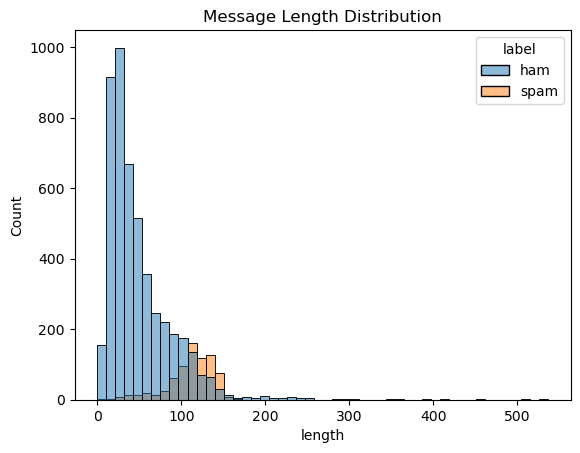

In [4]:
df['length'] = df['cleaned'].apply(len)

sns.histplot(data=df, x='length', hue='label', bins=50)
plt.title("Message Length Distribution")
plt.show()

In [28]:
# Predictive Modeling 

In [5]:
df['label_num'] = df['label'].map({'ham': 0, 'spam':1})

x_train, x_test, y_train, y_test = train_test_split(df['cleaned'], df['label_num'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
x_train_vector = vectorizer.fit_transform(x_train)
x_test_vector = vectorizer.transform(x_test)

model = MultinomialNB()
model.fit(x_train_vector, y_train)

y_pred = model.predict(x_test_vector)

In [44]:
# Evaluating the Model

In [6]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.79      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



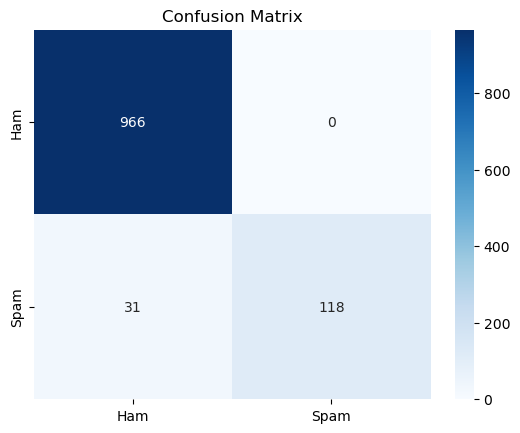

In [7]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap="Blues", annot=True, fmt='d',
           xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title("Confusion Matrix")
plt.show()

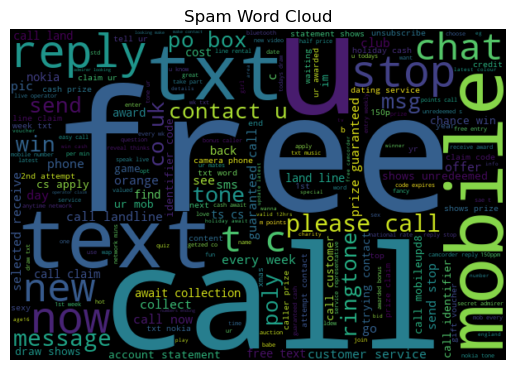

In [8]:
# Understanding the Data
spam_words = ''.join(df[df['label']== 'spam']['cleaned'])
ham_words = ''.join(df[df['label']== 'ham']['cleaned'])

word_cloud = WordCloud(width=600, height = 400).generate(spam_words)
plt.title("Spam Word Cloud")
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [9]:
def detect_spam(message):
    clean_message = clean_text(message)
    message_vector = vectorizer.transform([clean_message])
    prediction = model.predict(message_vector)[0]
    
    probability = model.predict_proba(message_vector)[0][1]
    percent = round(probability * 100, 2)
    
    if prediction == 1:
        return f"Spam ({percent}% likely)"
    else: 
        return f"Ham ({100 - percent}% likely)"

user_input = widgets.Text(placeholder='Type a message', description='Message:',
                          disabled=False)

submit_button = widgets.Button(description="Submit")

output = widgets.Output()

def on_submit_button(text):
    with output:
        output.clear_output()
        message = user_input.value
        prediction = detect_spam(message)
        print(f'\nMessage: {message}\n')
        print(f'Prediction: {prediction}')
        user_input.value = ''
        

print('\nSpam Message Detector\n')
submit_button.on_click(on_submit_button)
display(user_input, submit_button, output)


Spam Message Detector



Text(value='', description='Message:', placeholder='Type a message')

Button(description='Submit', style=ButtonStyle())

Output()